# Parte 2: Extracción de información de la BBDD.

En este notebook se obtiene información de la BBDD y la creación de diferentes gráficas para interpretar dicha información.

En este notebook se extrae:
1. PCA - Principal Componet Analysis
    * PCA - De todos los datos tanto de JJOO y WC.
    * PCA - De datos a partir de 1980 de JJOO y WC.
    * PCA - De las pruebas más importantes.
2. Información sobre diferentes edades y puntuaciones
    * Atleta más joven en JJOO
    * Atleta más mayor en JJOO
    * Atleta más joven en ganar JJOO
    * Atleta más mayor en ganar JJOO
    * Record de puntuación en JJOO
    * Record de puntuación en WC
    * Ganadores de JJOO con peor puntuación
    * Ganador de WC con peor puntuación
    * Mejores competiciones teniendo en cuenta todos sus participantes
    * Mejores pruebas de menos de 20, menos de 25 años vs más de 30 años a partir del 2000
3. Por pruebas
    * Mejores atletas en cada prueba para los 10 mejores
    * Edad media de los atletas en cada parte
4. Participación por paises
    * Paises con mayor participación en WC
    * Paises con mayor participacion en JJOO
    * Paises con mayor participacion en JJOO a partir de 1980
    * Mejores paises entre los 10 mejores en JJOO
    * Mejores paises entre los 10 mejores en WC
5. Puntuaciones por décadas
    * Edad mínima y máxima por décadas
    * Mejores puntuaciones de cada década
6. Otros
    * Comparación JJOO pista vs tartan
    * Comparación JJOO en altura vs anteriores y posteriores

In [1]:
import pandas as pd
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
#Lee el excel generado en el otro documento .ipynb
ddbb=pd.read_excel("/Github/DecatlonEstadistics/resources/data.xlsx")
del ddbb['1500m NF']

ddbb['Country']=ddbb['Country'].str.lower()

ddbb.columns = ['Position', 'Athlete', 'Age', 'Country', 'Total Points', 'Year', 'Competition', '100m', 
                 '100m Points', 'Lj', 'Lj Points', 'Sp', 'Sp Points', 'Hj', 'Hj Points', '400m', '400m Points', 
                 '110m H', '110m H Points', 'Dt', 'Dt Points', 'Pv', 'Pv Points', 'Jt', 'Jt Points', 
                 '1500m Points', '1500m']

#Coge unicamente los datos de cada prueba y sus puntuaciones 
#Para poder aplicar el algoritmo PCA
ddbbData = ddbb[['100m','100m Points','Lj','Lj Points','Sp','Sp Points','Hj','Hj Points','400m Points','400m',
                 '110m H','110m H Points','Dt','Dt Points','Pv','Pv Points','Jt','Jt Points','1500m Points','1500m']]

##  1. PCA - Principal Componet Analysis

##### 1.1 PCA - para todos los datos tanto de JJOO y WC.

Con esto obtenemos las variaciones entre las pruebas.

In [3]:
pca = PCA(n_components=3)
new = pca.fit_transform(ddbbData)

print("Datos de la primera componente")
print("------------------------------")
print(abs(pca.components_[0]),"\n")

print("Datos de la segunda componente")
print("------------------------------")
print(abs(pca.components_[1]),"\n")

print("Datos de la tercera componente")
print("------------------------------")
print(abs(pca.components_[2]),"\n")

Datos de la primera componente
------------------------------
[0.00082668 0.21813636 0.01888166 0.25675999 0.0365289  0.20673424
 0.00527657 0.29421646 0.25627066 0.03252487 0.00258469 0.35062112
 0.21150394 0.22773191 0.00232119 0.60136112 0.14449713 0.23795588
 0.1726157  0.01611737] 

Datos de la segunda componente
------------------------------
[2.90297509e-04 7.79707162e-02 6.56459721e-02 8.49316100e-02
 1.31445918e-01 7.71476074e-02 1.84359600e-02 1.06927900e-01
 9.08124200e-03 2.27104746e-01 7.42248688e-04 1.09945081e-01
 7.55275413e-01 9.84885078e-02 3.11491773e-04 1.21139305e-01
 5.28810681e-01 8.92293932e-02 3.50287606e-02 1.25034464e-03] 

Datos de la tercera componente
------------------------------
[1.78811587e-06 1.39697026e-03 1.20093858e-02 1.27319289e-02
 2.40570644e-02 1.42758704e-02 3.35497615e-03 2.93840825e-03
 8.58955847e-04 9.71972392e-01 2.92054034e-04 3.86151143e-02
 2.07598627e-01 6.19088438e-03 2.46435927e-05 6.89782239e-04
 9.64804258e-02 1.15523917e-02 9.36

Text(0.5, 1.0, 'PC3')

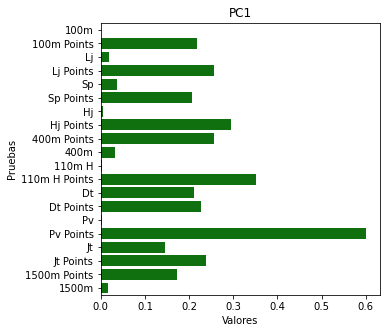

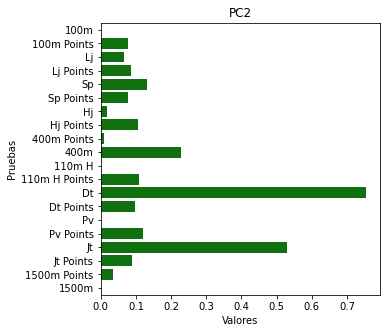

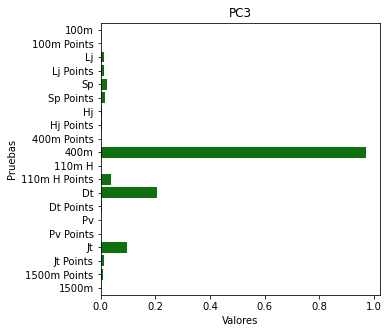

In [4]:
imp = pd.DataFrame({'Pruebas': ddbbData.columns, 'Valores': abs(pca.components_[0])})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'g').set_title('PC1')

imp = pd.DataFrame({'Pruebas': ddbbData.columns, 'Valores': abs(pca.components_[1])})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'g').set_title('PC2')

imp = pd.DataFrame({'Pruebas': ddbbData.columns, 'Valores': abs(pca.components_[2])})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'g').set_title('PC3')

#####  1.2 PCA - para todos los datos a partir de 1980 tanto de JJOO y WC.

Con esto obtenemos las variaciones entre las pruebas.

In [5]:
#Filtrado de los datos de JJOO hasta 1980
ddbbData = ddbb.copy()
prueba = []

for i in range(len(ddbbData)):
    if(ddbbData.iloc[i]['Year'] < 1980):
        prueba.append(i)
    
ddbbData.drop(prueba,inplace=True)

ddbbDataCopy = ddbbData.copy()
ddbbData = ddbbData[['100m','100m Points','Lj','Lj Points','Sp','Sp Points','Hj','Hj Points','400m Points','400m',
                    '110m H','110m H Points','Dt','Dt Points','Pv','Pv Points','Jt','Jt Points','1500m Points','1500m']]

#Algoritmo de PCA
pca = PCA(n_components=3)
new = pca.fit_transform(ddbbData)

print("Datos de la primera componente")
print("------------------------------")
print(abs(pca.components_[0]),"\n")

print("Datos de la segunda componente")
print("------------------------------")
print(abs(pca.components_[1]),"\n")

print("Datos de la tercera componente")
print("------------------------------")
print(abs(pca.components_[2]),"\n")

Datos de la primera componente
------------------------------
[4.59666422e-05 1.02958050e-02 7.92304151e-02 2.58326428e-02
 1.58044787e-01 1.00170939e-02 2.22372467e-02 1.61725885e-02
 1.01467699e-01 8.60193851e-02 2.80488333e-04 3.28668181e-02
 7.23489110e-01 2.52980214e-03 7.20323502e-04 1.43783026e-01
 6.34700821e-01 1.16528999e-02 3.49198339e-02 4.69515466e-03] 

Datos de la segunda componente
------------------------------
[5.13201322e-04 1.13127968e-01 9.59754825e-03 3.25709206e-01
 2.02479628e-02 1.64062201e-01 2.61631211e-03 1.35410741e-01
 9.64655966e-02 7.62579529e-03 1.24075674e-03 1.69139012e-01
 1.37096748e-01 1.53857236e-01 3.07614677e-03 8.48031922e-01
 8.04254316e-02 1.49436401e-01 8.29913359e-02 7.64003360e-03] 

Datos de la tercera componente
------------------------------
[2.51550978e-04 5.58587231e-02 6.55539042e-03 8.84951385e-01
 1.15060705e-02 3.07417416e-03 1.64358099e-03 2.07223568e-02
 6.40799260e-02 5.12667721e-03 3.92680335e-04 2.20426026e-01
 6.62584782e-02

Text(0.5, 1.0, 'PC3-> +1980')

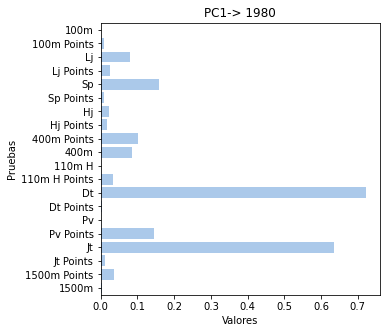

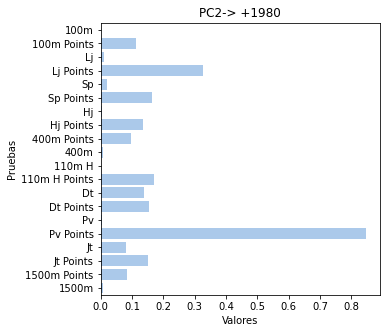

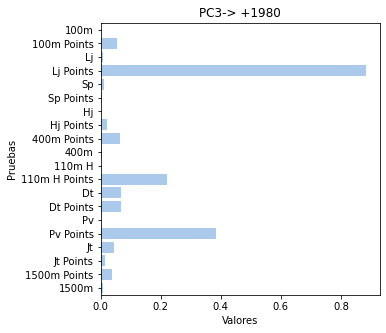

In [6]:
imp = pd.DataFrame({'Pruebas': ddbbData.columns, 'Valores': abs(pca.components_[0])})

plt.figure(figsize=(5,5))
sns.set_color_codes('pastel')
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'b').set_title('PC1-> 1980')

imp = pd.DataFrame({'Pruebas': ddbbData.columns, 'Valores': abs(pca.components_[1])})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'b').set_title('PC2-> +1980')

imp = pd.DataFrame({'Pruebas': ddbbData.columns, 'Valores': abs(pca.components_[2])})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'b').set_title('PC3-> +1980')

##### 1.3 PCA - para todos los datos de las 6 pruebas más importantes tanto de JJOO y WC.

Con esto obtenemos las variaciones entre las pruebas.

In [7]:
ddbbCopy = ddbb[['Lj','Lj Points','Sp','Sp Points','400m','400m Points',
                 'Dt','Dt Points','Pv','Pv Points','Jt','Jt Points']]

pca = PCA(n_components=3)
new = pca.fit_transform(ddbbCopy)

print("Datos de la primera componente")
print("------------------------------")
print(abs(pca.components_[0]),"\n")

print("Datos de la segunda componente")
print("------------------------------")
print(abs(pca.components_[1]),"\n")

print("Datos de la tercera componente")
print("------------------------------")
print(abs(pca.components_[2]),"\n")

Datos de la primera componente
------------------------------
[0.06354948 0.10740451 0.12635002 0.07927443 0.18677193 0.15740224
 0.72642642 0.07788133 0.00136254 0.32189119 0.5066227  0.09205731] 

Datos de la segunda componente
------------------------------
[0.02458961 0.30037963 0.05056177 0.24468791 0.17624274 0.22387051
 0.29201459 0.28178455 0.00255926 0.68972288 0.2059649  0.28764295] 

Datos de la tercera componente
------------------------------
[1.27854763e-02 3.65034452e-02 2.57314561e-02 3.36383680e-02
 9.65572336e-01 1.78513289e-02 2.18101185e-01 2.86146014e-02
 2.02980082e-04 6.13249530e-02 1.03455824e-01 3.47987752e-02] 



Text(0.5, 1.0, 'PC3-> 6 Pruebas')

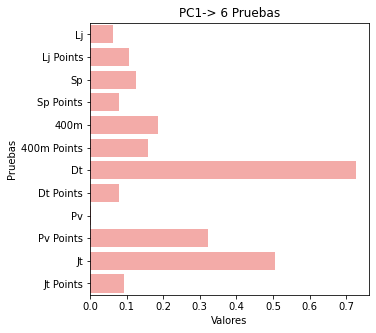

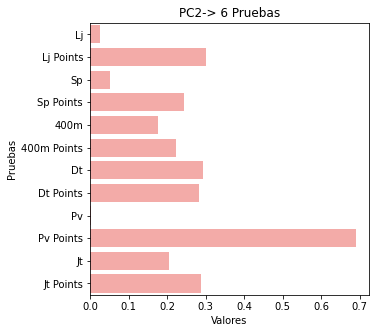

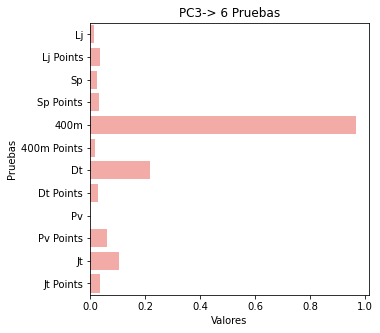

In [8]:
imp = pd.DataFrame({'Pruebas': ddbbCopy.columns, 'Valores': abs(pca.components_[0])})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'r').set_title('PC1-> 6 Pruebas')

imp = pd.DataFrame({'Pruebas': ddbbCopy.columns, 'Valores': abs(pca.components_[1])})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'r').set_title('PC2-> 6 Pruebas')

imp = pd.DataFrame({'Pruebas': ddbbCopy.columns, 'Valores': abs(pca.components_[2])})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'r').set_title('PC3-> 6 Pruebas')

## 2. Información sobre diferentes edades y puntuaciones

##### 2.1 Atleta más joven en JJOO

In [9]:
atleta = ddbb.iloc[0]

for i in range(len(ddbb)):
    if(atleta['Age'] > ddbb.iloc[i]['Age'] and ddbb.iloc[i]['Age']!=0):
        atleta = ddbb.iloc[i]

print("El atleta más joven en participar en unos JJOO es:",atleta['Athlete'], "con", 
      atleta['Age'],"años en el año", atleta['Year'],"en la posicion", atleta['Position'])

El atleta más joven en participar en unos JJOO es: Bob Mathias con 17 años en el año 1948 en la posicion 1


##### 2.2 Atleta más mayor en JJOO

In [10]:
atleta = ddbb.iloc[0]

for i in range(len(ddbb)):
    if(atleta['Age'] < ddbb.iloc[i]['Age'] and ddbb.iloc[i]['Age']!=0):
        atleta = ddbb.iloc[i]

print("El atleta más mayor en participar en unos JJOO es:",atleta['Athlete'], "con", 
      atleta['Age'],"años en el año", atleta['Year'],"en la posicion", atleta['Position'])

El atleta más mayor en participar en unos JJOO es: Witold Gerutto con 35 años en el año 1948 en la posicion 19


##### 2.3 Atleta más joven en ganar JJOO

In [11]:
atleta = ddbb.iloc[0]

for i in range(len(ddbb)):
    if(atleta['Age'] > ddbb.iloc[i]['Age'] and ddbb.iloc[i]['Age']!=0 and ddbb.iloc[i]['Position'] ==1):
        atleta = ddbb.iloc[i]

print("El atleta más joven en ganar en unos JJOO es:",atleta['Athlete'], "con", 
      atleta['Age'],"años en el año", atleta['Year'],"en la posicion", atleta['Position'])

El atleta más joven en ganar en unos JJOO es: Bob Mathias con 17 años en el año 1948 en la posicion 1


##### 2.4 Atleta más mayor en ganar JJOO

In [12]:
atleta = ddbb.iloc[0]

for i in range(len(ddbb)):
    if(atleta['Age'] < ddbb.iloc[i]['Age'] and ddbb.iloc[i]['Age']!=0 and ddbb.iloc[i]['Position'] ==1):
        atleta = ddbb.iloc[i]

print("El atleta más joven en mayor en ganar en unos JJOO es:",atleta['Athlete'], "con", 
      atleta['Age'],"años en el año", atleta['Year'],"en la posicion", atleta['Position'])

El atleta más joven en mayor en ganar en unos JJOO es: Dan O'Brien con 30 años en el año 1996 en la posicion 1


##### 2.5 Record de puntuación en JJOO

In [13]:
atleta = []
atleta.append(ddbb.iloc[0])

for i in range(len(ddbb)):
    if(atleta[0]['Total Points'] <= ddbb.iloc[i]['Total Points'] and ddbb.iloc[i]["Competition"] == 'JJOO'):
        if(atleta[0]['Total Points'] == ddbb.iloc[i]['Total Points']):
             atleta.append(ddbb.iloc[i])
        else:
            atleta.clear()
            atleta.append(ddbb.iloc[i])

for i in range(len(atleta)):
    print("El atleta que posee el recor olímpico es", atleta[i]['Athlete'],"con una puntuacion de",
         atleta[i]['Total Points'],"en los JJOO del año",atleta[i]['Year'])

El atleta que posee el recor olímpico es Roman Å ebrle con una puntuacion de 8893 en los JJOO del año 2004
El atleta que posee el recor olímpico es Ashton Eaton con una puntuacion de 8893 en los JJOO del año 2016


##### 2.6 Record de puntuación en WC

In [14]:
atleta = []
atleta.append(ddbb.iloc[0])

for i in range(len(ddbb)):
    if(atleta[0]['Total Points'] <= ddbb.iloc[i]['Total Points'] and ddbb.iloc[i]["Competition"] == 'WC'):
        if(atleta[0]['Total Points'] == ddbb.iloc[i]['Total Points']):
             atleta.append(ddbb.iloc[i])
        else:
            atleta.clear()
            atleta.append(ddbb.iloc[i])

for i in range(len(atleta)):
    print("El atleta que posee el recor mundial es", atleta[i]['Athlete'],"con una puntuacion de",
         atleta[i]['Total Points'],"en los mundiales del año",atleta[i]['Year'])

El atleta que posee el recor mundial es Ashton Eaton con una puntuacion de 9045 en los mundiales del año 2015


##### 2.7 Ganadores de JJOO con peor puntuación

In [15]:
atleta = ddbb.iloc[0]
atletaP = ddbb.iloc[0]
atletaP['Total Points'] = 9999

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Competition'] == 'JJOO' and atleta['Total Points'] > ddbb.iloc[i]['Total Points'] 
       and ddbb.iloc[i]['Position'] == 1):
        atleta = ddbb.iloc[i]

    if(ddbb.iloc[i]['Competition'] == 'JJOO' and atletaP['Total Points'] > ddbb.iloc[i]['Total Points'] 
       and ddbb.iloc[i]['Position'] == 1 and ddbb.iloc[i]['Year'] >= 1980):
        atletaP = ddbb.iloc[i]

        
print("La peor puntuacion con la que se han ganado unos JJOO es de",atleta['Total Points'],"En el año",atleta['Year'])
print("La peor puntuacion con la que se han ganado unos JJOO desde 1980 es de",atletaP['Total Points'],
     "En el año",atletaP['Year'])

<ipython-input-15-c962eae41ee2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atletaP['Total Points'] = 9999


La peor puntuacion con la que se han ganado unos JJOO es de 6476 En el año 1924
La peor puntuacion con la que se han ganado unos JJOO desde 1980 es de 8488 En el año 1988


##### 2.8 Ganador de WC con peor puntuación

In [16]:
atleta = ddbb.iloc[0]
atleta['Total Points'] = 9999

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Competition'] == 'WC' and atleta['Total Points'] > ddbb.iloc[i]['Total Points'] 
       and ddbb.iloc[i]['Position'] == 1):
        atleta = ddbb.iloc[i]
        
print("La peor puntuacion con la que se han ganado unos mundiales es de",atleta['Total Points'],"En el año",atleta['Year'])

<ipython-input-16-2379e185a4b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atleta['Total Points'] = 9999


La peor puntuacion con la que se han ganado unos mundiales es de 8607 En el año 2011


##### 2.9 Mejores competiciones teniendo en cuenta todos sus participantes

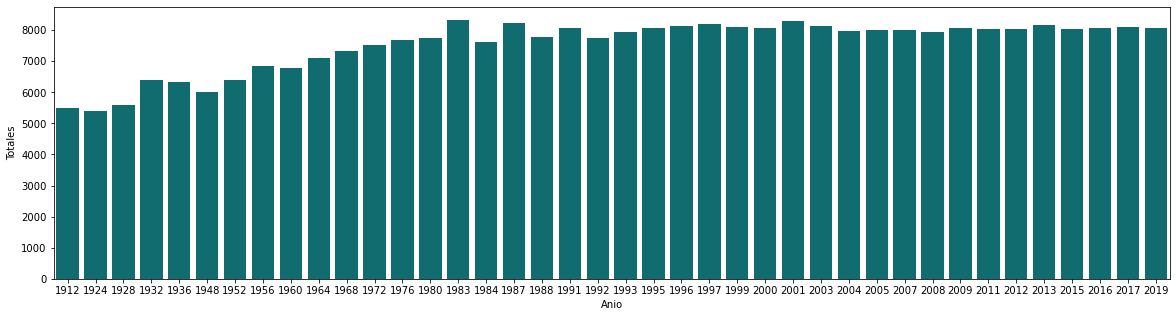

In [17]:
anio = []
totales = []
nParticipantes = []

aux = 0

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Year'] not in anio):
        anio.append(ddbb.iloc[i]['Year'])
        totales.append(ddbb.iloc[i]['Total Points'])
        nParticipantes.append(1)
    else:
            aux = anio.index(ddbb.iloc[i]['Year'])
            totales[aux] = totales[aux] + ddbb.iloc[i]['Total Points'] 
            nParticipantes[aux] = nParticipantes[aux] +1
            
for i in range(len(totales)):
    totales[i] = totales[i] / nParticipantes[i]
    
    
imp = pd.DataFrame({'Anio':anio,
                    'Totales':totales})

plt.figure(figsize=(20,5))
sns.barplot(x = 'Anio', y= 'Totales', data=imp, color = '#007b7f')

##### 2.10 Mejores pruebas de menos de 20, menos de 25 años vs más de 30 años a partir del 2000

<ipython-input-18-4e7db613328b>:73: RuntimeWarning: divide by zero encountered in double_scalars
  pMediaMas30[i]  = pMediaMas30[i] / auxMas30


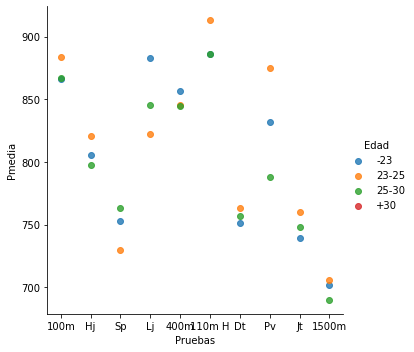

In [18]:
pMediaMenos20 = [0,0,0,0,0,0,0,0,0,0]
pMediaMenos25 = [0,0,0,0,0,0,0,0,0,0]
pMediaMenos30 = [0,0,0,0,0,0,0,0,0,0]
pMediaMas30 = [0,0,0,0,0,0,0,0,0,0]

auxMenos20 = 0
auxMenos25 = 0
auxMenos30 = 0
auxMas30 = 0

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Age'] > 30 and ddbb.iloc[i]['Year'] >= 2000):
      
        pMediaMas30[0] = pMediaMas30[0]+ ddbb.iloc[i]['100m Points']
        pMediaMas30[1] = pMediaMas30[1]+ ddbb.iloc[i]['Hj Points']
        pMediaMas30[2] = pMediaMas30[2]+ ddbb.iloc[i]['Sp Points']
        pMediaMas30[3] = pMediaMas30[3]+ ddbb.iloc[i]['Lj Points']
        pMediaMas30[4] = pMediaMas30[4]+ ddbb.iloc[i]['400m Points']
        pMediaMas30[5] = pMediaMas30[5]+ ddbb.iloc[i]['110m H Points']
        pMediaMas30[6] = pMediaMas30[6]+ ddbb.iloc[i]['Dt Points']
        pMediaMas30[7] = pMediaMas30[7]+ ddbb.iloc[i]['Pv Points']
        pMediaMas30[8] = pMediaMas30[8]+ ddbb.iloc[i]['Jt Points']
        pMediaMas30[9] = pMediaMas30[9]+ ddbb.iloc[i]['1500m Points']
        
        auxMas = auxMas30 +1
        
    elif (ddbb.iloc[i]['Age'] > 25 and ddbb.iloc[i]['Age'] < 30 and ddbb.iloc[i]['Year'] >= 2000):
        pMediaMenos30[0] = pMediaMenos30[0]+ ddbb.iloc[i]['100m Points']
        pMediaMenos30[1] = pMediaMenos30[1]+ ddbb.iloc[i]['Hj Points']
        pMediaMenos30[2] = pMediaMenos30[2]+ ddbb.iloc[i]['Sp Points']
        pMediaMenos30[3] = pMediaMenos30[3]+ ddbb.iloc[i]['Lj Points']
        pMediaMenos30[4] = pMediaMenos30[4]+ ddbb.iloc[i]['400m Points']
        pMediaMenos30[5] = pMediaMenos30[5]+ ddbb.iloc[i]['110m H Points']
        pMediaMenos30[6] = pMediaMenos30[6]+ ddbb.iloc[i]['Dt Points']
        pMediaMenos30[7] = pMediaMenos30[7]+ ddbb.iloc[i]['Pv Points']
        pMediaMenos30[8] = pMediaMenos30[8]+ ddbb.iloc[i]['Jt Points']
        pMediaMenos30[9] = pMediaMenos30[9]+ ddbb.iloc[i]['1500m Points']
                            
        auxMenos30 = auxMenos30 + 1
        
    elif (ddbb.iloc[i]['Age'] > 23 and ddbb.iloc[i]['Age'] < 25 and ddbb.iloc[i]['Year'] >= 2000):
        pMediaMenos25[0] = pMediaMenos25[0]+ ddbb.iloc[i]['100m Points']
        pMediaMenos25[1] = pMediaMenos25[1]+ ddbb.iloc[i]['Hj Points']
        pMediaMenos25[2] = pMediaMenos25[2]+ ddbb.iloc[i]['Sp Points']
        pMediaMenos25[3] = pMediaMenos25[3]+ ddbb.iloc[i]['Lj Points']
        pMediaMenos25[4] = pMediaMenos25[4]+ ddbb.iloc[i]['400m Points']
        pMediaMenos25[5] = pMediaMenos25[5]+ ddbb.iloc[i]['110m H Points']
        pMediaMenos25[6] = pMediaMenos25[6]+ ddbb.iloc[i]['Dt Points']
        pMediaMenos25[7] = pMediaMenos25[7]+ ddbb.iloc[i]['Pv Points']
        pMediaMenos25[8] = pMediaMenos25[8]+ ddbb.iloc[i]['Jt Points']
        pMediaMenos25[9] = pMediaMenos25[9]+ ddbb.iloc[i]['1500m Points']
                            
        auxMenos25 = auxMenos25 + 1
    
    elif (ddbb.iloc[i]['Age'] < 23 and ddbb.iloc[i]['Year'] >= 2000):
        pMediaMenos20[0] = pMediaMenos20[0]+ ddbb.iloc[i]['100m Points']
        pMediaMenos20[1] = pMediaMenos20[1]+ ddbb.iloc[i]['Hj Points']
        pMediaMenos20[2] = pMediaMenos20[2]+ ddbb.iloc[i]['Sp Points']
        pMediaMenos20[3] = pMediaMenos20[3]+ ddbb.iloc[i]['Lj Points']
        pMediaMenos20[4] = pMediaMenos20[4]+ ddbb.iloc[i]['400m Points']
        pMediaMenos20[5] = pMediaMenos20[5]+ ddbb.iloc[i]['110m H Points']
        pMediaMenos20[6] = pMediaMenos20[6]+ ddbb.iloc[i]['Dt Points']
        pMediaMenos20[7] = pMediaMenos20[7]+ ddbb.iloc[i]['Pv Points']
        pMediaMenos20[8] = pMediaMenos20[8]+ ddbb.iloc[i]['Jt Points']
        pMediaMenos20[9] = pMediaMenos20[9]+ ddbb.iloc[i]['1500m Points']
                            
        auxMenos20 = auxMenos20 + 1
    
for i in range(len(pMediaMenos20)):
    pMediaMenos20[i] = pMediaMenos20[i] / auxMenos20
    pMediaMenos25[i] = pMediaMenos25[i] / auxMenos25
    pMediaMenos30[i] = pMediaMenos30[i] / auxMenos30
    pMediaMas30[i]  = pMediaMas30[i] / auxMas30


pruebas = ['100m','Hj','Sp','Lj','400m','110m H','Dt','Pv','Jt','1500m',
          '100m','Hj','Sp','Lj','400m','110m H','Dt','Pv','Jt','1500m',
          '100m','Hj','Sp','Lj','400m','110m H','Dt','Pv','Jt','1500m',
          '100m','Hj','Sp','Lj','400m','110m H','Dt','Pv','Jt','1500m']
age = ['-23','-23','-23','-23','-23','-23','-23','-23','-23','-23',
      '23-25','23-25','23-25','23-25','23-25','23-25','23-25','23-25','23-25','23-25',
      '25-30','25-30','25-30','25-30','25-30','25-30','25-30','25-30','25-30','25-30',
      '+30','+30','+30','+30','+30','+30','+30','+30','+30','+30']

pMedias = np.concatenate((pMediaMenos20,pMediaMenos25,pMediaMenos30,pMediaMas30))

imp = pd.DataFrame({'Pruebas': pruebas,
                    'Pmedia': pMedias,
                    'Edad': age})


sns.lmplot(x='Pruebas', y='Pmedia',hue = 'Edad', data=imp,fit_reg=False)

## 3. Por pruebas

##### 3.1 Mejores atletas en cada prueba para los 10 mejores

/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 155 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1440x1440 with 0 Axes>

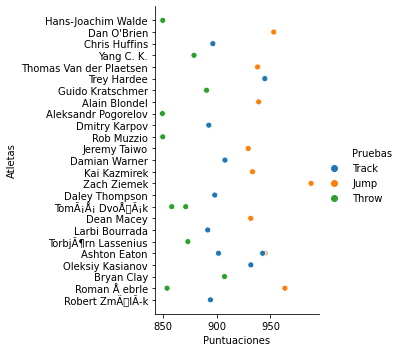

In [19]:
auxTrack = 0
auxJump = 0
auxThrow = 0

pointTrack = []
pointJump = []
pointThrow = []
athleteTrack = []
athleteJump = []
athleteThrow = []

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Competition']=='JJOO'):
        auxTrack = (ddbb.iloc[i]['100m Points']+ddbb.iloc[i]['400m Points']+ddbb.iloc[i]['110m H Points']+ddbb.iloc[i]['1500m Points'])/4
        auxJump = (ddbb.iloc[i]['Hj Points']+ddbb.iloc[i]['Pv Points']+ddbb.iloc[i]['Lj Points'])/3
        auxThrow = (ddbb.iloc[i]['Dt Points']+ddbb.iloc[i]['Sp Points']+ddbb.iloc[i]['Jt Points'])/3
        if(len(pointTrack)<=10):
            athleteTrack.append(ddbb.iloc[i])
            athleteJump.append(ddbb.iloc[i])
            athleteThrow.append(ddbb.iloc[i])
            pointTrack.append(auxTrack)
            pointJump.append(auxJump)
            pointThrow.append(auxThrow)
        else:
            if(min(pointTrack) < auxTrack):
                pointTrack[pointTrack.index(min(pointTrack))] = auxTrack
                athleteTrack[pointTrack.index(min(pointTrack))] = ddbb.iloc[i]
            if(min(pointJump) < auxJump):
                pointJump[pointJump.index(min(pointJump))] = auxJump
                athleteJump[pointJump.index(min(pointJump))] = ddbb.iloc[i]
            if(min(pointThrow) < auxThrow):
                pointThrow[pointThrow.index(min(pointThrow))] = auxThrow
                athleteThrow[pointThrow.index(min(pointThrow))] = ddbb.iloc[i]
            
atletas = []
puntuaciones = []
pruebas = []
edades = []
anios = []
posiciones = []

for i in range(10):
    atletas.append(athleteTrack[i]['Athlete'])
    puntuaciones.append(pointTrack[i])
    edades.append(athleteTrack[i]['Age'])
    anios.append(athleteTrack[i]['Year'])
    pruebas.append('Track')
    posiciones.append(athleteTrack[i]['Position'])
    atletas.append(athleteJump[i]['Athlete'])
    puntuaciones.append(pointJump[i])
    edades.append(athleteJump[i]['Age'])
    anios.append(athleteJump[i]['Year'])
    pruebas.append('Jump')
    posiciones.append(athleteJump[i]['Position'])
    atletas.append(athleteThrow[i]['Athlete'])
    puntuaciones.append(pointThrow[i])
    edades.append(athleteThrow[i]['Age'])
    anios.append(athleteThrow[i]['Year'])
    pruebas.append('Throw')
    posiciones.append(athleteThrow[i]['Position'])
    
imp = pd.DataFrame({'Pruebas':pruebas,
                    'Puntuaciones':puntuaciones,
                    'Edades':edades,
                    'Anios':anios,
                    'Atletas':atletas,
                    'Posiciones':posiciones})

#Ver que tipo de pruebas dan una mayor puntuacion
plt.figure(figsize=(20,20))
sns.relplot(x = 'Puntuaciones', y= 'Atletas', hue= 'Pruebas', data = imp)

<Figure size 1440x1440 with 0 Axes>

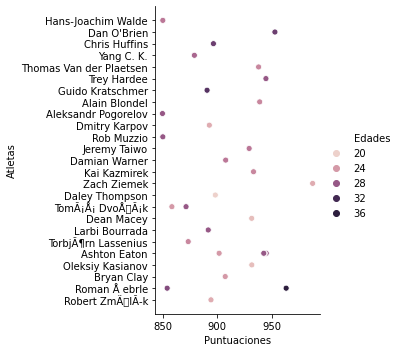

In [20]:
#Ver a que edades consiguen dicha puntuacion
plt.figure(figsize=(20,20))
sns.relplot(x = 'Puntuaciones', y= 'Atletas', hue= 'Edades', data = imp)

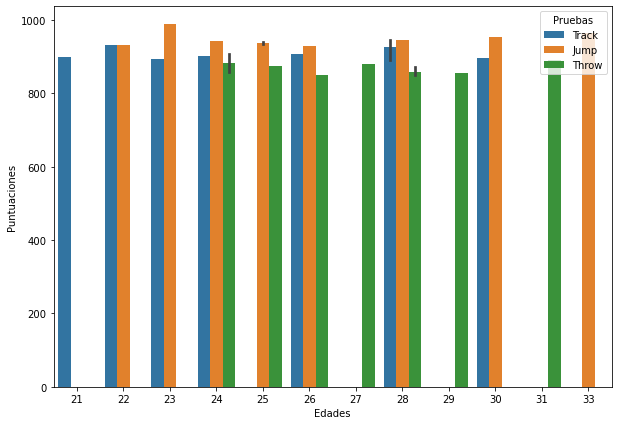

In [21]:
#Como quedarian dichas puntuaciones segun sus edades
plt.figure(figsize=(10,7))
sns.barplot(x = 'Edades', y= 'Puntuaciones', hue= 'Pruebas', data = imp)

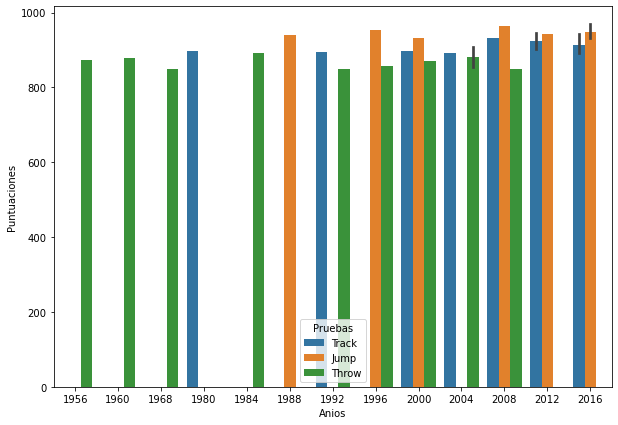

In [22]:
#En que años consiguen esas marcas
plt.figure(figsize=(10,7))
sns.barplot(x = 'Anios', y= 'Puntuaciones', hue= 'Pruebas', data = imp)

##### 3.2 Edad media de los atletas en cada parte

In [23]:
mediaT = 0
mediaJ = 0
mediaTh =0

for i in range(10):
    mediaT = mediaT + athleteTrack[i]['Age']
    mediaJ = mediaJ + athleteJump[i]['Age']
    mediaTh = mediaTh + athleteThrow[i]['Age']
mediaT = mediaT/10
mediaJ = mediaJ/10
mediaTh = mediaTh/10

print("La edad media de los mejores en las pruebas de pista es: ", mediaT)
print("La edad media de los mejores en las pruebas de pista es: ", mediaJ)
print("La edad media de los mejores en las pruebas de pista es: ", mediaTh)

La edad media de los mejores en las pruebas de pista es:  25.3
La edad media de los mejores en las pruebas de pista es:  26.1
La edad media de los mejores en las pruebas de pista es:  27.0


## 4. Participación por paises

##### 4.1 Paises con mayor participación en JJOO

El número de países participantes es 81


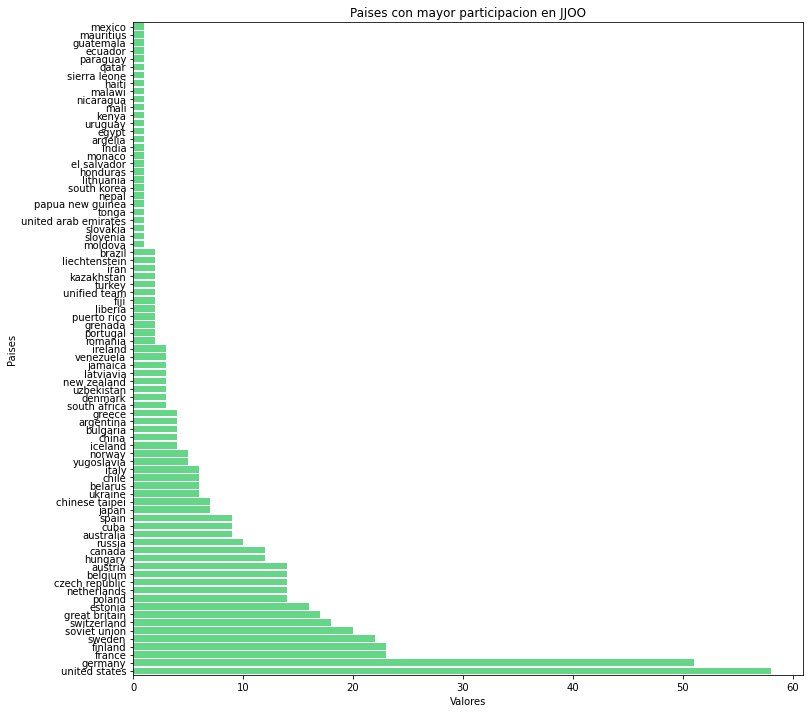

In [24]:
paises = []
cantidad = []

aux = 0
cont = 0

for i in ddbb['Country']:
    if (i not in paises and ddbb.iloc[cont]['Competition'] == "JJOO"):
        paises.append(i)
        cantidad.append(1)
    elif (i in paises and ddbb.iloc[cont]['Competition'] == "JJOO"):
        aux = paises.index(i)
        cantidad[aux] = cantidad[aux] +1
    cont = cont +1
        
imp = pd.DataFrame({'Paises': paises, 'Valores': cantidad})


plt.figure(figsize=(12,12))
sns.barplot(x = 'Valores', y = 'Paises', data = imp, color = '#52E881',order=imp.sort_values('Valores').Paises).set_title(
    'Paises con mayor participacion en JJOO')

print("El número de países participantes es",len(paises))

##### 4.2 Paises con mayor participación en JJOO a partir de 1980

El número de países participantes es 67


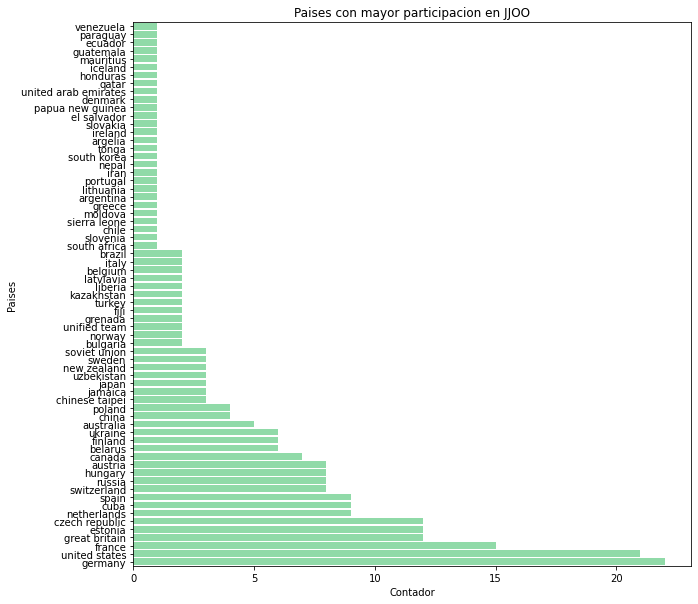

In [25]:
paises = []
cantidad = []

aux = 0
cont = 0

for i in ddbb['Country']:
    if (i not in paises and ddbb.iloc[cont]['Competition'] == "JJOO" and ddbb.iloc[cont]['Year'] >= 1980):
        paises.append(i)
        cantidad.append(1)
    elif (i in paises and ddbb.iloc[cont]['Competition'] == "JJOO" and ddbb.iloc[cont]['Year'] >= 1980):
        aux = paises.index(i)
        cantidad[aux] = cantidad[aux] +1
    cont = cont +1
        
imp = pd.DataFrame({'Paises': paises, 'Contador': cantidad})


plt.figure(figsize=(10,10))
sns.barplot(x = 'Contador', y = 'Paises', data = imp, color = '#84E6A3',order=imp.sort_values('Contador').Paises).set_title(
    'Paises con mayor participacion en JJOO')

print("El número de países participantes es",len(paises))

##### 4.3 Paises con mayor participación en WC

El número de países participantes es 48


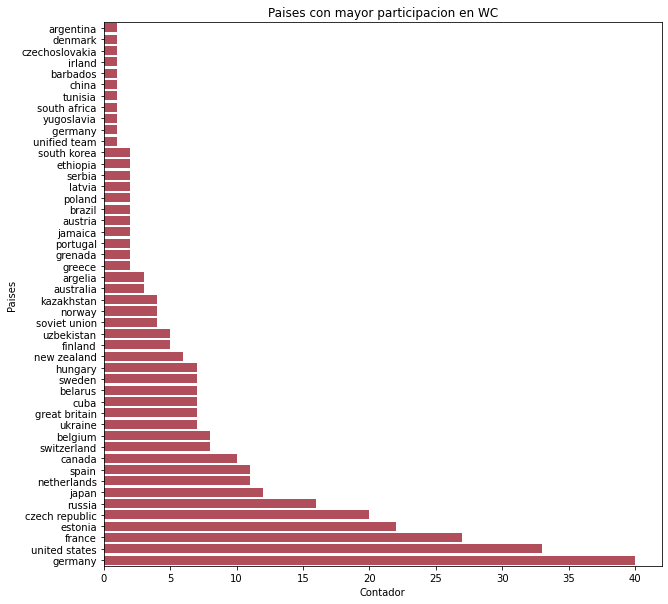

In [26]:
paises = []
cantidad = []

aux = 0
cont = 0

for i in ddbb['Country']:
    if (i not in paises and ddbb.iloc[cont]['Competition'] == "WC" and ddbb.iloc[cont]['Year'] >= 1983):
        paises.append(i)
        cantidad.append(1)
    elif (i in paises and ddbb.iloc[cont]['Competition'] == "WC" and ddbb.iloc[cont]['Year'] >= 1983):
        aux = paises.index(i)
        cantidad[aux] = cantidad[aux] +1
    cont = cont +1
        
imp = pd.DataFrame({'Paises': paises, 'Contador': cantidad})


plt.figure(figsize=(10,10))
sns.barplot(x = 'Contador', y = 'Paises', data = imp, color ="#C03F4F", order=imp.sort_values('Contador').Paises).set_title('Paises con mayor participacion en WC')

print("El número de países participantes es",len(paises))

##### 4.4 Mejores paises entre los 10 mejores en JJOO

El número de países participantes es 38


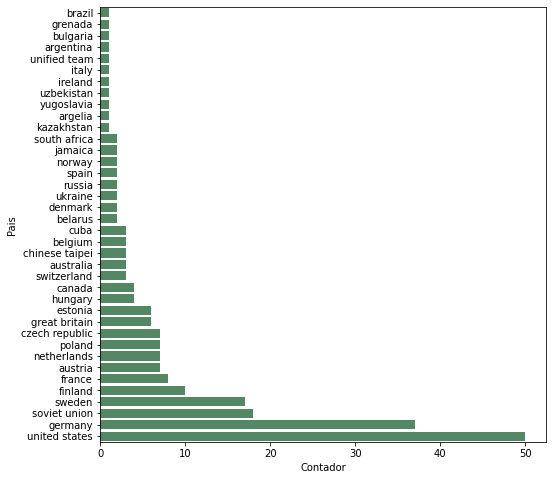

In [27]:
paises= []
contador= []
aux = 0

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Position'] <= 10 and ddbb.iloc[i]['Competition'] == 'JJOO'):
        if(ddbb.iloc[i]['Country'] not in paises):
            paises.append(ddbb.iloc[i]['Country'])
            contador.append(1)
        else:
            aux = paises.index(ddbb.iloc[i]['Country'])
            contador[aux] = contador[aux] + 1        


            
imp = pd.DataFrame({'Contador':contador,
                    'Pais':paises})

plt.figure(figsize=(8,8))
sns.barplot(x = 'Contador', y= 'Pais', data = imp,color="#4B9060", order=imp.sort_values('Contador').Pais)

print("El número de países participantes es",len(paises))

##### 4.5  Mejores paises entre los 10 mejores en WC

El número de países participantes es 32


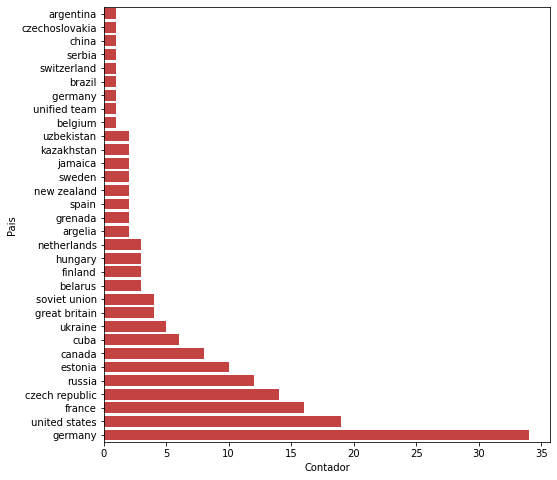

In [33]:
paises= []
contador= []
aux = 0

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Position'] <= 10 and ddbb.iloc[i]['Competition'] == 'WC'):
        if(ddbb.iloc[i]['Country'] not in paises):
            paises.append(ddbb.iloc[i]['Country'])
            contador.append(1)
        else:
            aux = paises.index(ddbb.iloc[i]['Country'])
            contador[aux] = contador[aux] + 1        

imp = pd.DataFrame({'Contador':contador,
                    'Pais':paises})

plt.figure(figsize=(8,8))
sns.barplot(x = 'Contador', y= 'Pais', data = imp,color='#D82E2E', order=imp.sort_values('Contador').Pais)
print("El número de países participantes es",len(paises))

## 5. Puntuaciones por décadas

##### 5.1 Edad mínima y máxima por décadas JJOO

22


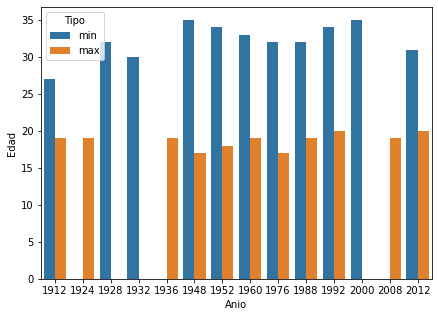

In [29]:
edad = [0,0,0,0,0,0,0,0,0,0,0]
atleta = [0,0,0,0,0,0,0,0,0,0,0]
anio = [0,0,0,0,0,0,0,0,0,0,0]
competicion = [0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Year'] < 1920 and ddbb.iloc[i]['Age'] > edad[0]):
        edad[0] = ddbb.iloc[i]['Age']
        atleta[0] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1920 and ddbb.iloc[i]['Year'] < 1930 and ddbb.iloc[i]['Age'] > edad[1]):
        edad[1] = ddbb.iloc[i]['Age']
        atleta[1] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1930 and ddbb.iloc[i]['Year'] < 1940 and ddbb.iloc[i]['Age'] > edad[2]):
        edad[2] = ddbb.iloc[i]['Age']
        atleta[2] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1940 and ddbb.iloc[i]['Year'] < 1950 and ddbb.iloc[i]['Age'] > edad[3]):
        edad[3] = ddbb.iloc[i]['Age']
        atleta[3] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1950 and ddbb.iloc[i]['Year'] < 1960 and ddbb.iloc[i]['Age'] > edad[4]):
        edad[4] = ddbb.iloc[i]['Age']
        atleta[4] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1960 and ddbb.iloc[i]['Year'] < 1970 and ddbb.iloc[i]['Age'] > edad[5]):
        edad[5] = ddbb.iloc[i]['Age']
        atleta[5] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1970 and ddbb.iloc[i]['Year'] < 1980 and ddbb.iloc[i]['Age'] > edad[6]):
        edad[6] = ddbb.iloc[i]['Age']
        atleta[6] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1980 and ddbb.iloc[i]['Year'] < 1990 and ddbb.iloc[i]['Age'] > edad[7]):
        edad[7] = ddbb.iloc[i]['Age']
        atleta[7] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1990 and ddbb.iloc[i]['Year'] < 2000 and ddbb.iloc[i]['Age'] > edad[8]):
        edad[8] = ddbb.iloc[i]['Age']
        atleta[8] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2000 and ddbb.iloc[i]['Year'] < 2010 and ddbb.iloc[i]['Age'] > edad[9]):
        edad[9] = ddbb.iloc[i]['Age']
        atleta[9] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2010 and ddbb.iloc[i]['Year'] < 2020 and ddbb.iloc[i]['Age'] > edad[10]):
        edad[10] = ddbb.iloc[i]['Age']
        atleta[10] = ddbb.iloc[i]

for i in range(len(atleta)):
    anio[i] = atleta[i]['Year']
    competicion[i] = atleta[i]['Competition']

    
edadMax = [99,99,99,99,99,99,99,99,99,99,99]
atleta = [0,0,0,0,0,0,0,0,0,0,0]
anioMax = [0,0,0,0,0,0,0,0,0,0,0]
compMax = [0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Year'] < 1920 and ddbb.iloc[i]['Age'] < edadMax[0]):
        edadMax[0] = ddbb.iloc[i]['Age']
        atleta[0] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1920 and ddbb.iloc[i]['Year'] < 1930 and ddbb.iloc[i]['Age'] < edadMax[1]and ddbb.iloc[i]['Age']!=0):
        edadMax[1] = ddbb.iloc[i]['Age']
        atleta[1] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1930 and ddbb.iloc[i]['Year'] < 1940 and ddbb.iloc[i]['Age'] < edadMax[2]and ddbb.iloc[i]['Age']!=0):
        edadMax[2] = ddbb.iloc[i]['Age']
        atleta[2] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1940 and ddbb.iloc[i]['Year'] < 1950 and ddbb.iloc[i]['Age'] < edadMax[3]and ddbb.iloc[i]['Age']!=0):
        edadMax[3] = ddbb.iloc[i]['Age']
        atleta[3] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1950 and ddbb.iloc[i]['Year'] < 1960 and ddbb.iloc[i]['Age'] < edadMax[4]and ddbb.iloc[i]['Age']!=0):
        edadMax[4] = ddbb.iloc[i]['Age']
        atleta[4] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1960 and ddbb.iloc[i]['Year'] < 1970 and ddbb.iloc[i]['Age'] < edadMax[5]and ddbb.iloc[i]['Age']!=0):
        edadMax[5] = ddbb.iloc[i]['Age']
        atleta[5] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1970 and ddbb.iloc[i]['Year'] < 1980 and ddbb.iloc[i]['Age'] < edadMax[6]and ddbb.iloc[i]['Age']!=0):
        edadMax[6] = ddbb.iloc[i]['Age']
        atleta[6] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1980 and ddbb.iloc[i]['Year'] < 1990 and ddbb.iloc[i]['Age'] < edadMax[7]and ddbb.iloc[i]['Age']!=0):
        edadMax[7] = ddbb.iloc[i]['Age']
        atleta[7] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1990 and ddbb.iloc[i]['Year'] < 2000 and ddbb.iloc[i]['Age'] < edadMax[8]and ddbb.iloc[i]['Age']!=0):
        edadMax[8] = ddbb.iloc[i]['Age']
        atleta[8] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2000 and ddbb.iloc[i]['Year'] < 2010 and ddbb.iloc[i]['Age'] < edadMax[9]and ddbb.iloc[i]['Age']!=0):
        edadMax[9] = ddbb.iloc[i]['Age']
        atleta[9] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2010 and ddbb.iloc[i]['Year'] < 2020 and ddbb.iloc[i]['Age'] < edadMax[10]and ddbb.iloc[i]['Age']!=0):
        edadMax[10] = ddbb.iloc[i]['Age']
        atleta[10] = ddbb.iloc[i]

for i in range(len(atleta)):
    anioMax[i] = atleta[i]['Year']
    compMax[i] = atleta[i]['Competition']
    
anioTotal = np.concatenate((anio,anioMax))
edadTotal = np.concatenate((edad,edadMax))
competitionTotal = np.concatenate((competicion,compMax))

print(len(competitionTotal))

tipo = ['min','min','min','min','min','min','min','min','min','min','min',
       'max','max','max','max','max','max','max','max','max','max','max']
    
imp = pd.DataFrame({'Anio': anioTotal,
                    'Competicion': competitionTotal,
                    'Edad': edadTotal,
                    'Tipo': tipo})


plt.figure(figsize=(7,5))
sns.barplot(x = 'Anio', y= 'Edad',hue = 'Tipo', data=imp)

##### 5.2 Mejores puntuaciones de cada década

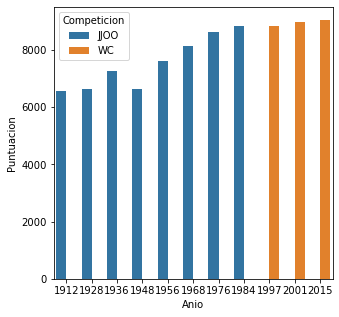

In [30]:
puntuacion = [0,0,0,0,0,0,0,0,0,0,0]
atleta = [0,0,0,0,0,0,0,0,0,0,0]
anio = [0,0,0,0,0,0,0,0,0,0,0]
competicion = [0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Year'] < 1920 and ddbb.iloc[i]['Total Points'] > puntuacion[0]):
        puntuacion[0] = ddbb.iloc[i]['Total Points']
        atleta[0] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1920 and ddbb.iloc[i]['Year'] < 1930 and ddbb.iloc[i]['Total Points'] > puntuacion[1]):
        puntuacion[1] = ddbb.iloc[i]['Total Points']
        atleta[1] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1930 and ddbb.iloc[i]['Year'] < 1940 and ddbb.iloc[i]['Total Points'] > puntuacion[2]):
        puntuacion[2] = ddbb.iloc[i]['Total Points']
        atleta[2] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1940 and ddbb.iloc[i]['Year'] < 1950 and ddbb.iloc[i]['Total Points'] > puntuacion[3]):
        puntuacion[3] = ddbb.iloc[i]['Total Points']
        atleta[3] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1950 and ddbb.iloc[i]['Year'] < 1960 and ddbb.iloc[i]['Total Points'] > puntuacion[4]):
        puntuacion[4] = ddbb.iloc[i]['Total Points']
        atleta[4] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1960 and ddbb.iloc[i]['Year'] < 1970 and ddbb.iloc[i]['Total Points'] > puntuacion[5]):
        puntuacion[5] = ddbb.iloc[i]['Total Points']
        atleta[5] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1970 and ddbb.iloc[i]['Year'] < 1980 and ddbb.iloc[i]['Total Points'] > puntuacion[6]):
        puntuacion[6] = ddbb.iloc[i]['Total Points']
        atleta[6] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1980 and ddbb.iloc[i]['Year'] < 1990 and ddbb.iloc[i]['Total Points'] > puntuacion[7]):
        puntuacion[7] = ddbb.iloc[i]['Total Points']
        atleta[7] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1990 and ddbb.iloc[i]['Year'] < 2000 and ddbb.iloc[i]['Total Points'] > puntuacion[8]):
        puntuacion[8] = ddbb.iloc[i]['Total Points']
        atleta[8] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2000 and ddbb.iloc[i]['Year'] < 2010 and ddbb.iloc[i]['Total Points'] > puntuacion[9]):
        puntuacion[9] = ddbb.iloc[i]['Total Points']
        atleta[9] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2010 and ddbb.iloc[i]['Year'] < 2020 and ddbb.iloc[i]['Total Points'] > puntuacion[10]):
        puntuacion[10] = ddbb.iloc[i]['Total Points']
        atleta[10] = ddbb.iloc[i]

for i in range(len(atleta)):
    anio[i] = atleta[i]['Year']
    competicion[i] = atleta[i]['Competition']

    
imp = pd.DataFrame({'Anio': anio,
                    'Competicion': competicion,
                    'Puntuacion': puntuacion})


plt.figure(figsize=(5,5))
sns.barplot(x = 'Anio', y= 'Puntuacion',hue = 'Competicion', data=imp)

## 6. Otros

##### 6.1 Comparación JJOO pista vs tartan

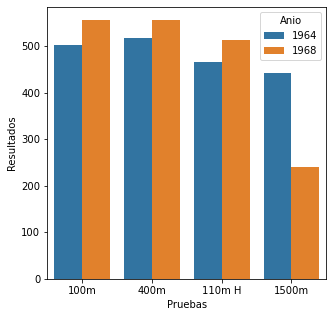

In [31]:
p1964 = []
p1968 = []
pruebas = []
total1964 = 0
total1968 = 0

anios = []
results = []
aux = 0
aux1 = 0


ddbbTrack = ddbb[['Athlete','Position','Year','100m Points','400m Points','110m H Points','1500m Points']]

for i in range(len(ddbbTrack)):
    if(ddbbTrack.iloc[i]['Year'] == 1964 and ddbbTrack.iloc[i]['Position'] <= 5):
        
        p1964.append(ddbbTrack.iloc[i]['100m Points'])
        anios.append('1964')
        pruebas.append('100m')
        p1964.append(ddbbTrack.iloc[i]['400m Points'])
        anios.append('1964')
        pruebas.append('400m')
        p1964.append(ddbbTrack.iloc[i]['110m H Points'])
        anios.append('1964')
        pruebas.append('110m H')
        p1964.append(ddbbTrack.iloc[i]['1500m Points'])
        anios.append('1964')
        pruebas.append('1500m')
        aux = aux +1
        
    if(ddbbTrack.iloc[i]['Year'] == 1968 and ddbbTrack.iloc[i]['Position'] <= 5):
       
        p1968.append(ddbbTrack.iloc[i]['100m Points'])
        anios.append('1968')
        pruebas.append('100m')
        p1968.append(ddbbTrack.iloc[i]['400m Points'])
        anios.append('1968')
        pruebas.append('400m')
        p1968.append(ddbbTrack.iloc[i]['110m H Points'])
        anios.append('1968')
        pruebas.append('110m H')
        p1968.append(ddbbTrack.iloc[i]['1500m Points'])
        anios.append('1968')
        pruebas.append('1500m')
        aux1 = aux1 +1

r = (p1964[0]+p1964[4]+p1964[8])/aux
results.append(r)

r = (p1964[1]+p1964[5]+p1964[9])/aux
results.append(r)

r = (p1964[2]+p1964[6]+p1964[10])/aux
results.append(r)

r = (p1964[3]+p1964[7]+p1964[11])/aux
results.append(r)


r = (p1968[0]+p1968[4]+p1968[8])/aux1
results.append(r)

r = (p1968[1]+p1968[5]+p1968[9])/aux1
results.append(r)

r = (p1968[2]+p1968[6]+p1968[10])/aux1
results.append(r)

r = (p1968[3]+p1968[7]+p1968[11])/aux1
results.append(r)

pruebas =['100m','400m','110m H','1500m','100m','400m','110m H','1500m']
anios = ['1964','1964','1964','1964','1968','1968','1968','1968']

imp = pd.DataFrame({'Pruebas': pruebas,
                    'Resultados': results,
                    'Anio': anios})


plt.figure(figsize=(5,5))
sns.barplot(x = 'Pruebas', y= 'Resultados',hue = 'Anio', data=imp)

##### 6.2 Comparación JJOO en altura vs anteriores y posteriores

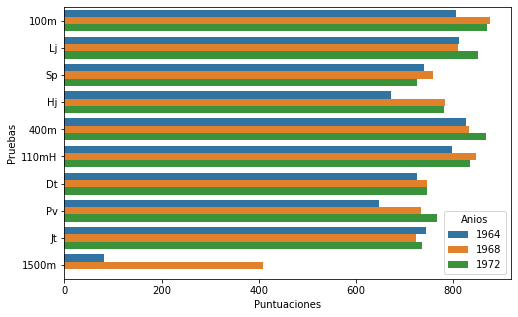

In [32]:
ddbbData = ddbb.copy()

p100 = [0,0,0]
lj = [0,0,0]
sp = [0,0,0]
hj = [0,0,0]
p400 = [0,0,0]
p110 = [0,0,0]
dt = [0,0,0]
pv = [0,0,0]
jt = [0,0,0]
p1500 = [0,0,0]

prueba = []
for i in range(len(ddbbData)):
    if(ddbbData.iloc[i]['Year'] != 1968 and ddbbData.iloc[i]['Year'] != 1964 and ddbbData.iloc[i]['Year'] != 1972):
        prueba.append(i)
ddbbData.drop(prueba,inplace=True)

for i in range(len(ddbbData)):
    if(ddbbData.iloc[i]['Position'] <= 10 and ddbbData.iloc[i]['Year'] == 1964):
        p100[0] = p100[0] + ddbbData.iloc[i]['100m Points']
        lj[0] = lj[0] + ddbbData.iloc[i]['Lj Points']
        sp[0] = sp[0] + ddbbData.iloc[i]['Sp Points']
        hj[0] = hj[0] + ddbbData.iloc[i]['Hj Points']
        p400[0] = p400[0] + ddbbData.iloc[i]['400m Points']
        p110[0] = p110[0] + ddbbData.iloc[i]['110m H Points']
        dt[0] = dt[0] + ddbbData.iloc[i]['Dt Points']
        pv[0] = pv[0] + ddbbData.iloc[i]['Pv Points']
        jt[0] = jt[0] + ddbbData.iloc[i]['Jt Points']
        p1500[0] = p1500[0] + ddbbData.iloc[i]['1500m Points']
    if(ddbbData.iloc[i]['Position'] <= 10 and ddbbData.iloc[i]['Year'] == 1968):
        p100[1] = p100[1] + ddbbData.iloc[i]['100m Points']
        lj[1] = lj[1] + ddbbData.iloc[i]['Lj Points']
        sp[1] = sp[1] + ddbbData.iloc[i]['Sp Points']
        hj[1] = hj[1] + ddbbData.iloc[i]['Hj Points']
        p400[1] = p400[1] + ddbbData.iloc[i]['400m Points']
        p110[1] = p110[1] + ddbbData.iloc[i]['110m H Points']
        dt[1] = dt[1] + ddbbData.iloc[i]['Dt Points']
        pv[1] = pv[1] + ddbbData.iloc[i]['Pv Points']
        jt[1] = jt[1] + ddbbData.iloc[i]['Jt Points']
        p1500[1] = p1500[1] + ddbbData.iloc[i]['1500m Points']
    if(ddbbData.iloc[i]['Position'] <= 10 and ddbbData.iloc[i]['Year'] == 1972):
        p100[2] = p100[2] + ddbbData.iloc[i]['100m Points']
        lj[2] = lj[2] + ddbbData.iloc[i]['Lj Points']
        sp[2] = sp[2] + ddbbData.iloc[i]['Sp Points']
        hj[2] = hj[2] + ddbbData.iloc[i]['Hj Points']
        p400[2] = p400[2] + ddbbData.iloc[i]['400m Points']
        p110[2] = p110[2] + ddbbData.iloc[i]['110m H Points']
        dt[2] = dt[2] + ddbbData.iloc[i]['Dt Points']
        pv[2] = pv[2] + ddbbData.iloc[i]['Pv Points']
        jt[2] = jt[2] + ddbbData.iloc[i]['Jt Points']
        p1500[0] = p1500[2] + ddbbData.iloc[i]['1500m Points']

for i in range(3):
    p100[i] = p100[i]/10
    lj[i] = lj[i]/10
    sp[i] = sp[i]/10
    hj[i] = hj[i]/10
    p400[i] = p400[i]/10
    p110[i] = p110[i]/10
    dt[i] = dt[i]/10
    pv[i] = pv[i]/10
    jt[i] = jt[i]/10
    p1500[i] = p1500[i]/10
    
results = np.concatenate((p100, lj, sp, hj, p400, p110, dt, pv, jt, p1500))
anios = [1964, 1968, 1972,1964, 1968, 1972,1964, 1968, 1972,1964, 1968, 1972,1964, 1968, 1972,
        1964, 1968, 1972,1964, 1968, 1972,1964, 1968, 1972,1964, 1968, 1972,1964, 1968, 1972]
pruebas = ['100m','100m','100m','Lj','Lj','Lj','Sp','Sp','Sp','Hj','Hj','Hj','400m','400m','400m','110mH','110mH','110mH',
       'Dt','Dt','Dt','Pv','Pv','Pv','Jt','Jt','Jt','1500m','1500m','1500m']

imp = pd.DataFrame({'Puntuaciones': results,
                    'Anios': anios,
                    'Pruebas': pruebas})

plt.figure(figsize=(8,5))
sns.barplot(x = 'Puntuaciones', y = 'Pruebas',hue = 'Anios', data = imp)